# Titanicデータ解析

## データ準備

### ライブラリのインポート

In [2]:
""" ライブラリのインポート
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### データの読み込みと、学習とテストデータの結合

In [3]:
""" 学習データとテストデータの読み込み
"""
train = pd.read_csv('./input/titanic/train.csv')
test = pd.read_csv('./input/titanic/test.csv')

""" データを一度結合
"""
data = pd.concat([train, test], sort=False)


## データ確認

### 欠損データの数を確認

In [23]:
print('全体データ数')
print(len(data))
print('空データ率')
print(data.isnull().sum()/len(data))


全体データ数
1309
空データ率
PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.774637
Embarked       0.000000
dtype: float64


In [5]:
print('学習データの全体データ数')
print(len(train))
print('学習データの空データ率')
print(train.isnull().sum()/len(train))

学習データの全体データ数
891
学習データの空データ率
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


### 質データを数値データに変換

In [6]:
""" 性別を男性:0、女性:1に変換
"""
#data['Sex'].fillna(('male'), inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1}).astype(int)

""" 乗船地を'S','C','Q'を0,1,2に変換
"""
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)


### 各変数の相関を確認

生存と性別は関連がある。（女性の生存率が0.54と高い）


             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000  0.110153 -0.082977 -0.001252  0.042221 -0.079741   
Survived        0.110153  1.000000 -0.033032  0.548320 -0.232924  0.132599   
Pclass         -0.082977 -0.033032  1.000000  0.055758 -0.318563 -0.084097   
Sex            -0.001252  0.548320  0.055758  1.000000 -0.171627  0.144033   
Age             0.042221 -0.232924 -0.318563 -0.171627  1.000000 -0.160939   
SibSp          -0.079741  0.132599 -0.084097  0.144033 -0.160939  1.000000   
Parch          -0.063456  0.038081  0.058366  0.103543 -0.276572  0.265411   
Fare            0.017243  0.128306 -0.311713  0.136973 -0.085007  0.290696   
Embarked       -0.032551  0.092673 -0.090961  0.082240  0.044832  0.030282   

                Parch      Fare  Embarked  
PassengerId -0.063456  0.017243 -0.032551  
Survived     0.038081  0.128306  0.092673  
Pclass       0.058366 -0.311713 -0.090961  
Sex          0.103543  0.136973  0.082240  

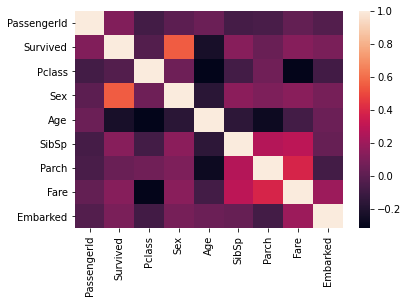

In [26]:
""" 全体ヒートマップ
"""
sns.heatmap(data.dropna().corr())
print(data.dropna().corr())


             PassengerId  Survived    Pclass  Sex       Age     SibSp  \
PassengerId     1.000000 -0.008790 -0.066358  NaN  0.081516 -0.046699   
Survived       -0.008790  1.000000 -0.477114  NaN  0.128290 -0.263284   
Pclass         -0.066358 -0.477114  1.000000  NaN -0.450072  0.099288   
Sex                  NaN       NaN       NaN  NaN       NaN       NaN   
Age             0.081516  0.128290 -0.450072  NaN  1.000000 -0.145492   
SibSp          -0.046699 -0.263284  0.099288  NaN -0.145492  1.000000   
Parch           0.034852 -0.223644  0.105077  NaN -0.088275  0.278316   
Fare            0.062873  0.218466 -0.618673  NaN  0.276999  0.081558   
Embarked        0.037641  0.109562  0.111404  NaN -0.018490 -0.194458   

                Parch      Fare  Embarked  
PassengerId  0.034852  0.062873  0.037641  
Survived    -0.223644  0.218466  0.109562  
Pclass       0.105077 -0.618673  0.111404  
Sex               NaN       NaN       NaN  
Age         -0.088275  0.276999 -0.018490  
SibSp

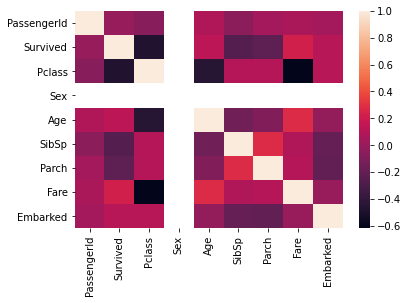

In [27]:
""" 女性のヒートマップ
"""
sns.heatmap(data[data['Sex'] == 1].corr())
print(data[data['Sex'] == 1].corr())

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000  0.242622 -0.243619  0.256625 -0.036704  0.345655   
Survived        0.242622  1.000000 -0.309019  0.756491 -0.141249  0.386859   
Pclass         -0.243619 -0.309019  1.000000 -0.262395  0.040829 -0.304116   
Sex             0.256625  0.756491 -0.262395  1.000000 -0.118976  0.320965   
Age            -0.036704 -0.141249  0.040829 -0.118976  1.000000 -0.055054   
SibSp           0.345655  0.386859 -0.304116  0.320965 -0.055054  1.000000   
Parch           0.157529  0.021359 -0.216003  0.115982 -0.001299  0.255844   
Fare            0.294894  0.290507 -0.412509  0.259904  0.044383  0.277270   
Embarked        0.055832  0.045851 -0.061278 -0.017612  0.079778 -0.132271   

                Parch      Fare  Embarked  
PassengerId  0.157529  0.294894  0.055832  
Survived     0.021359  0.290507  0.045851  
Pclass      -0.216003 -0.412509 -0.061278  
Sex          0.115982  0.259904 -0.017612  

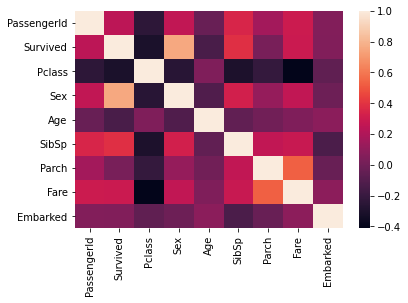

In [35]:
""" 50歳以上のヒートマップ
"""
sns.heatmap(data[(data['Age'] > 50)].corr())
print(data[(data['Age'] > 50)].corr())

### 生存者・死亡者比
全データ900に対して、死亡が約550名、生存が約350名程度で、11:7の割合になっている。

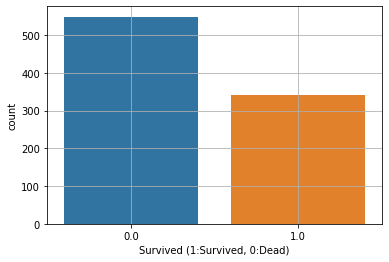

In [9]:
sns.countplot(data=data, x='Survived')
plt.xlabel('Survived (1:Survived, 0:Dead)')
plt.grid(True)

---

## 各パラメータと生死の関係を可視化

### 客室クラス 比較

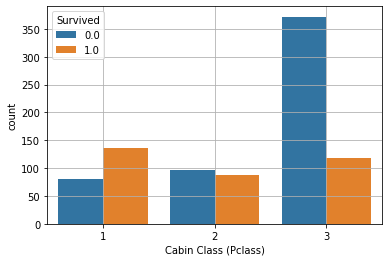

In [10]:
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.xlabel('Cabin Class (Pclass)')
plt.grid(True)

### 男女数 比較

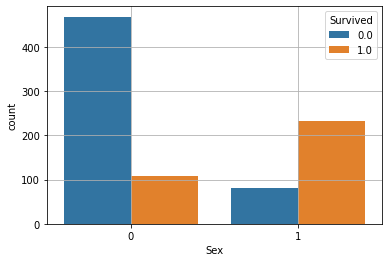

In [11]:
sns.countplot(data=data, x='Sex', hue='Survived')
plt.xlabel('Sex')
plt.grid(True)

### 年齢の分布

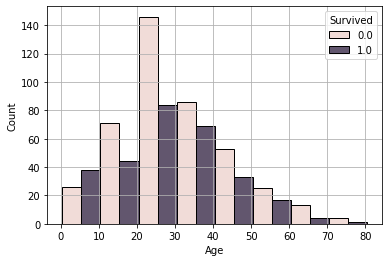

In [12]:
sns.histplot(data=data, x='Age', binwidth=10, hue='Survived', multiple="dodge")
plt.xlabel('Age')
plt.grid(True)

### 兄弟、配偶者の数

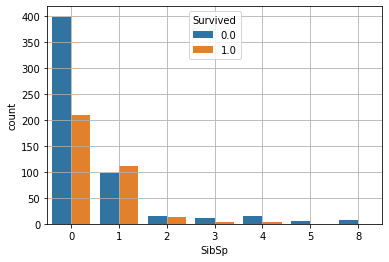

In [13]:
sns.countplot(data=data, x='SibSp', hue='Survived')
plt.xlabel('SibSp')
plt.grid(True)

### 両親、子供の数

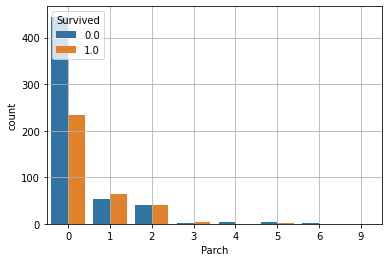

In [14]:
sns.countplot(data=data, x='Parch', hue='Survived')
plt.xlabel('Parch')
plt.grid(True)

### 乗船地 比較

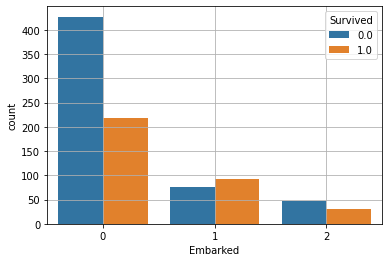

In [15]:
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.xlabel('Embarked')
plt.grid(True)

### チケット料金 分布

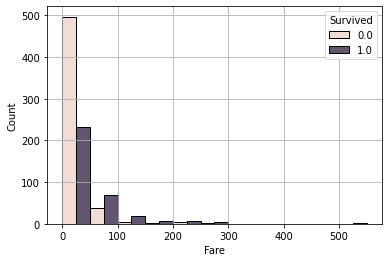

In [16]:
sns.histplot(data=data, x='Fare', binwidth=50, hue='Survived', multiple='dodge')
plt.xlabel('Fare')
plt.grid(True)

---

### 50歳以上の生存比率

---

<AxesSubplot:xlabel='Survived', ylabel='count'>

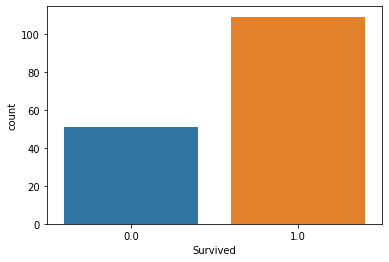

In [17]:
sns.countplot(data=data[data['Fare'] > 50], x='Survived')

### チケット料金と性別と生存率の関係

<AxesSubplot:xlabel='Survived', ylabel='count'>

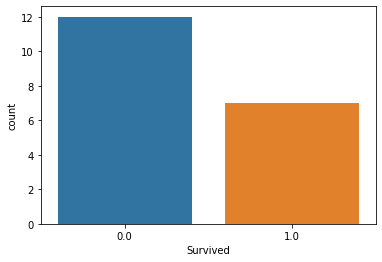

In [18]:
""" 料金ごとに生存数がどのように違うかを視覚化
"""
sns.countplot(data=data[(data['Fare'] > 100) & (data['Sex'] == 0)], x='Survived')

### 客室クラスと料金の関係を箱ひげ図で表現

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

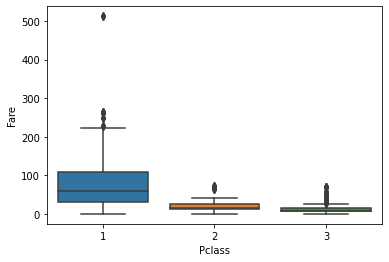

In [19]:
""" 客室クラスと料金の関係を箱ひげ図で表現
"""
sns.boxplot(data=data, x='Pclass', y='Fare')

## 欠損データを補完 データのクリーニング

In [20]:
""" 料金は平均値で補完
"""
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)

""" 年齢と客室クラスは相関があるので、クラス毎の平均で補完
"""
data['Age'] = data.groupby('Pclass').transform(lambda d: d.fillna(d.mean()))['Age']

/tmp/ipykernel_2942/3195270422.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  data['Age'] = data.groupby('Pclass').transform(lambda d: d.fillna(d.mean()))['Age']
